#1. Cài đặt và import

In [21]:
# Import các thư viện cần thiết
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Đường dẫn ảnh
img_path = '/content/drive/MyDrive/CV_2024_data/hinh1.jpg'

print("Đã sẵn sàng! Chạy các phần tiếp theo.")

Đã sẵn sàng! Chạy các phần tiếp theo.


In [6]:
img_path = '/content/drive/MyDrive/CV_2024_data/hinh1.jpg'

#2. OpenCV đọc ảnh như thế nào? Hiển thị chiều (shape) của ảnh

In [22]:
img = cv.imread(img_path)

if img is None:
    print("Không đọc được ảnh! Kiểm tra đường dẫn.")
else:
    print("Kiểu dữ liệu:", type(img))          # <class 'numpy.ndarray'>
    print("Chiều của ảnh (height, width, channels):", img.shape)
    print("Số chiều:", img.ndim)                # thường là 3 với ảnh màu
    print("Kiểu phần tử:", img.dtype)           # thường uint8

Kiểu dữ liệu: <class 'numpy.ndarray'>
Chiều của ảnh (height, width, channels): (650, 1280, 3)
Số chiều: 3
Kiểu phần tử: uint8


#3. Hiển thị ảnh trực quan bằng plt.imshow()

Đọc ảnh thành công! Shape: (650, 1280, 3)


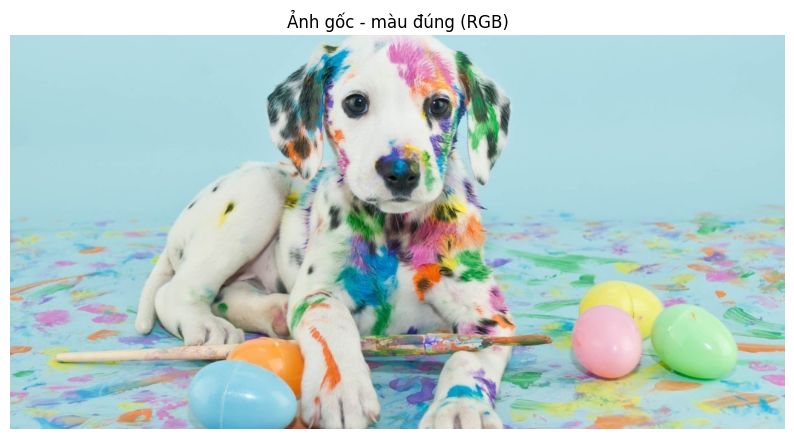

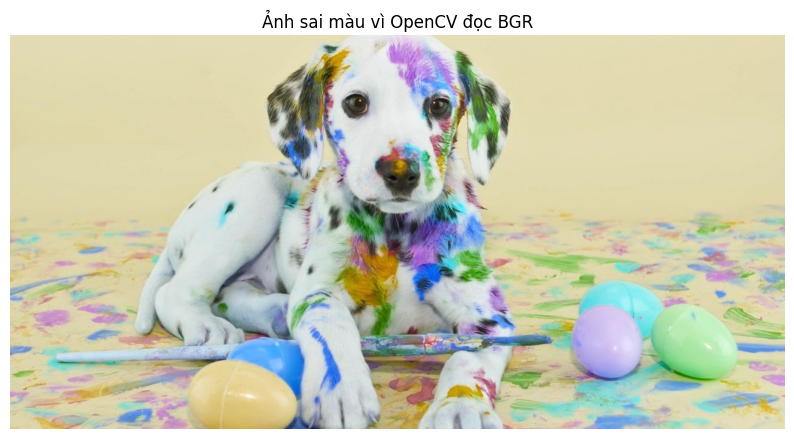


Nhận xét về bức ảnh:
- OpenCV đọc ảnh theo thứ tự kênh BGR (Blue-Green-Red).
- matplotlib.pyplot.imshow() mặc định hiểu là RGB → màu bị đảo (đỏ thành xanh, xanh thành đỏ).
- Cách sửa:
  1. Đảo kênh thủ công: img[:, :, ::-1] → nhanh, phổ biến
  2. Convert bằng OpenCV: cv.cvtColor(img, cv.COLOR_BGR2RGB) → rõ ràng, chuẩn
- Cả hai cách đều hiển thị màu đúng như ảnh gốc.


In [23]:
# Đọc ảnh và kiểm tra
img = cv.imread(img_path)

if img is None:
    print("LỖI: Không đọc được ảnh!")
    print("Kiểm tra đường dẫn:", img_path)
    !ls -l "/content/drive/MyDrive/CV_2024_data/"
else:
    print("Đọc ảnh thành công! Shape:", img.shape)

    # Cách sửa màu: đảo kênh BGR → RGB (cách đơn giản & nhanh)
    img_rgb = img[:, :, ::-1]

    # Hiển thị ảnh đúng màu
    plt.figure(figsize=(10, 7))
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc - màu đúng (RGB)")
    plt.axis('off')
    plt.show()

    # Hiển thị để so sánh: ảnh sai màu (BGR nguyên bản)
    plt.figure(figsize=(10, 7))
    plt.imshow(img)
    plt.title("Ảnh sai màu vì OpenCV đọc BGR")
    plt.axis('off')
    plt.show()

    # Nhận xét
    print("\nNhận xét về bức ảnh:")
    print("- OpenCV đọc ảnh theo thứ tự kênh BGR (Blue-Green-Red).")
    print("- matplotlib.pyplot.imshow() mặc định hiểu là RGB → màu bị đảo (đỏ thành xanh, xanh thành đỏ).")
    print("- Cách sửa:")
    print("  1. Đảo kênh thủ công: img[:, :, ::-1] → nhanh, phổ biến")
    print("  2. Convert bằng OpenCV: cv.cvtColor(img, cv.COLOR_BGR2RGB) → rõ ràng, chuẩn")
    print("- Cả hai cách đều hiển thị màu đúng như ảnh gốc.")

#4. phóng to ảnh (resize)


Kích thước sau khi phóng to: (975, 1920, 3)


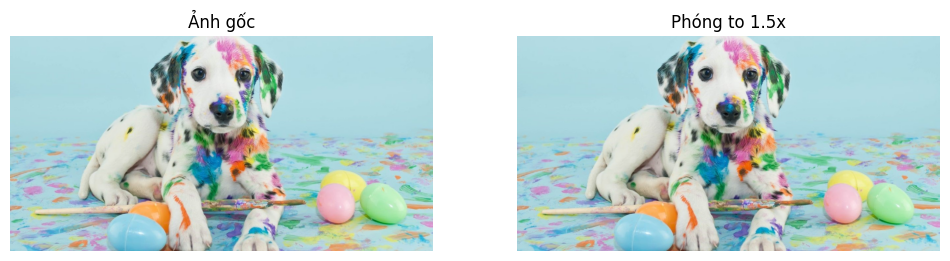

In [24]:
if 'img_rgb' not in globals():
    print("Chạy phần câu 2 trước để có img_rgb!")
else:
    # Phóng to gấp 1.5 lần (bạn có thể thay đổi scale)
    scale = 1.5
    new_size = (int(img_rgb.shape[1] * scale), int(img_rgb.shape[0] * scale))

    img_resized = cv.resize(img_rgb, new_size, interpolation=cv.INTER_CUBIC)

    print("Kích thước sau khi phóng to:", img_resized.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_resized)
    plt.title(f"Phóng to {scale}x")
    plt.axis('off')
    plt.show()

#5: Crop ảnh (cắt vùng)

Kích thước sau crop: (325, 640, 3)


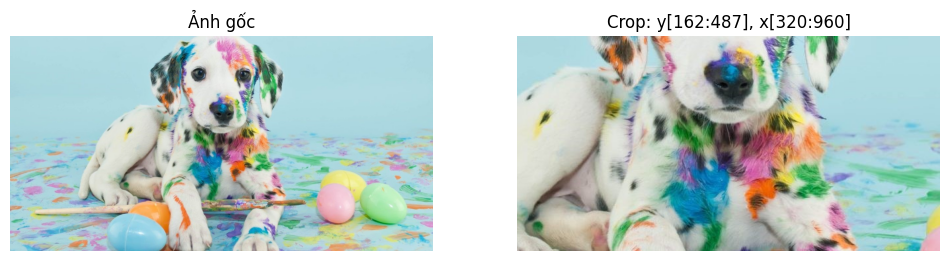

In [25]:
if 'img_rgb' not in globals():
    print("Chạy phần câu 2 trước để có img_rgb!")
else:
    h, w = img_rgb.shape[:2]

    # Ví dụ: crop vùng giữa (từ 1/4 đến 3/4 chiều cao và rộng)
    y_start, y_end = h//4, 3*h//4
    x_start, x_end = w//4, 3*w//4

    img_cropped = img_rgb[y_start:y_end, x_start:x_end]

    print("Kích thước sau crop:", img_cropped.shape)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_cropped)
    plt.title(f"Crop: y[{y_start}:{y_end}], x[{x_start}:{x_end}]")
    plt.axis('off')
    plt.show()

#6. Ghép dọc và ghép ngang 2 bức ảnh

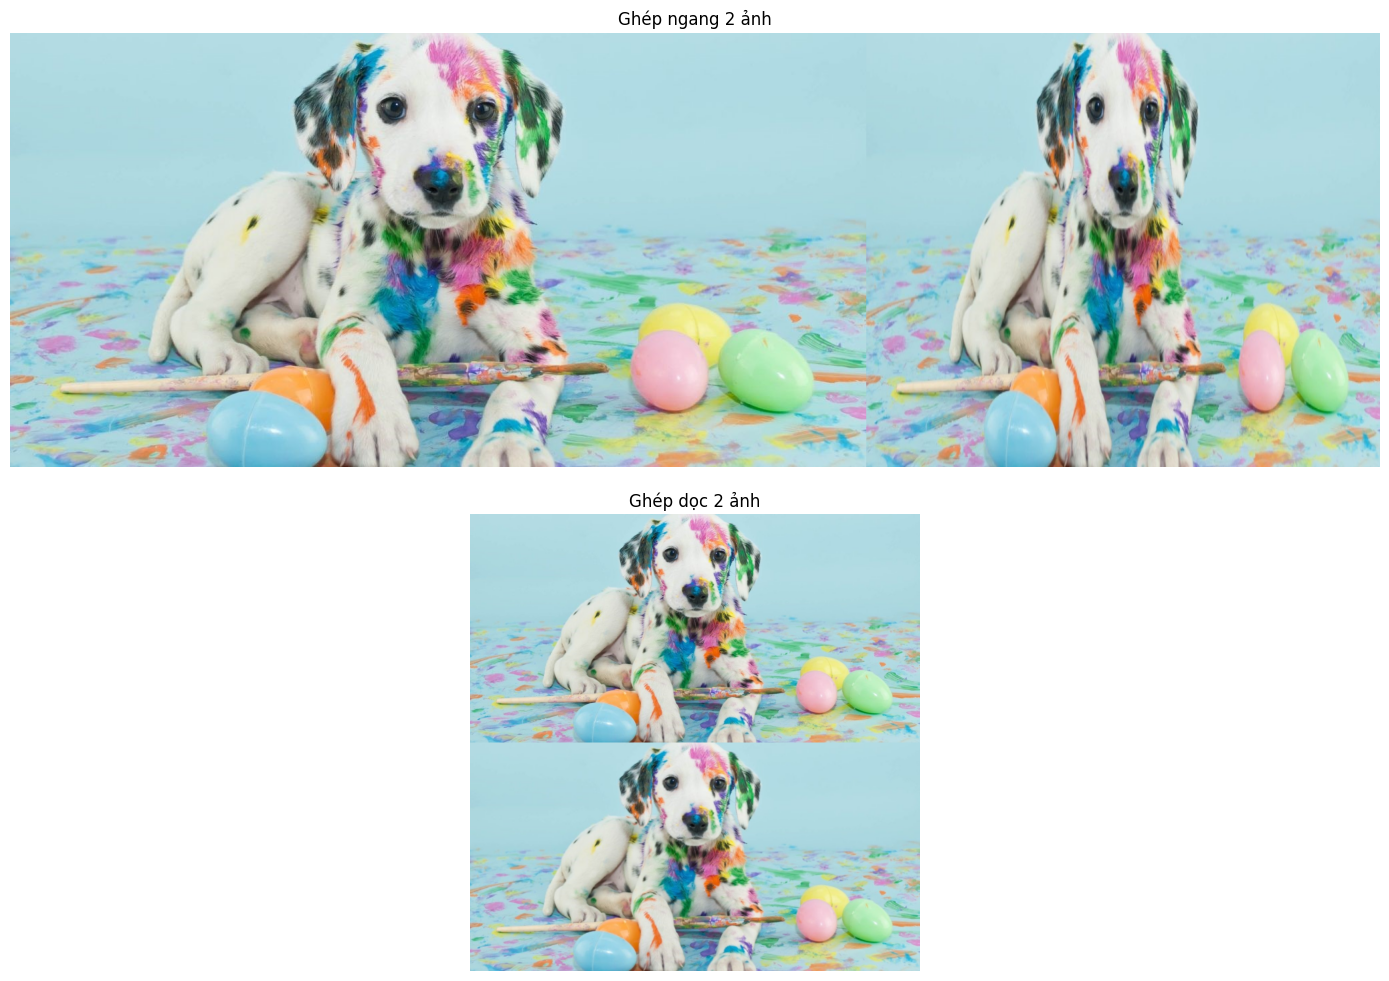

In [26]:
if 'img_rgb' not in globals():
    print("Chạy phần câu 2 trước để có img_rgb!")
else:
    # Dùng cùng 1 ảnh để demo (bạn có thể đọc ảnh thứ 2 nếu muốn)
    img1 = img_rgb
    img2 = cv.resize(img_rgb, None, fx=0.6, fy=0.6)  # làm nhỏ ảnh 2 để dễ ghép

    # Ghép ngang (side by side)
    # Resize để cùng chiều cao nếu cần
    if img1.shape[0] != img2.shape[0]:
        img2 = cv.resize(img2, (img2.shape[1], img1.shape[0]))
    img_horizontal = np.hstack((img1, img2))

    # Ghép dọc (one above the other)
    # Resize để cùng chiều rộng nếu cần
    if img1.shape[1] != img2.shape[1]:
        img2 = cv.resize(img2, (img1.shape[1], img2.shape[0]))
    img_vertical = np.vstack((img1, img2))

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 1, 1)
    plt.imshow(img_horizontal)
    plt.title("Ghép ngang 2 ảnh")
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.imshow(img_vertical)
    plt.title("Ghép dọc 2 ảnh")
    plt.axis('off')

    plt.tight_layout()
    plt.show()